<a href="https://colab.research.google.com/github/Oktavian19/2341720117_ML_2025/blob/main/JS13/P3_JS13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np

np.random.seed(42)
tf.random.set_seed(42)

# Contoh dataset (buat dummy data)
data = pd.DataFrame({
    'luas': [50, 60, 70, 80, 90],
    'harga': [500, 600, 700, 800, 900]
})

X = data[['luas']]
y = data[['harga']]

# Normalisasi
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [2]:
def lr_experiment(lr):
  tf.keras.backend.clear_session()

  # Model
  model = tf.keras.Sequential([
      tf.keras.layers.Dense(10, activation='relu', input_shape=(1,)),
      tf.keras.layers.Dense(1)
  ])

  opt = tf.keras.optimizers.Adam(learning_rate=lr)

  model.compile(optimizer=opt, loss='mse')

  model.fit(X_train, y_train, epochs=100, verbose=0)

  loss = model.evaluate(X_test, y_test, verbose=0)

  pred_scaled = model.predict(X_test, verbose=0)

  # Evaluasi
  print("Prediksi:", model.predict(X_test))

  return {
      'Learning Rate': lr,
      'MSE Loss (Test)': loss,
      'Prediksi (Scaled)': pred_scaled[0][0]
  }

In [3]:
lr_list = [0.1, 0.01, 0.001, 0.0001]
results = []

print("Sedang melatih model dengan variasi Learning Rate...")
for lr in lr_list:
    res = lr_experiment(lr)
    results.append(res)
    print(f"Selesai training LR: {lr}")

Sedang melatih model dengan variasi Learning Rate...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediksi: [[-0.89640594]]
Selesai training LR: 0.1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediksi: [[-0.8349832]]
Selesai training LR: 0.01
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediksi: [[-0.13211504]]
Selesai training LR: 0.001
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediksi: [[-0.12599099]]
Selesai training LR: 0.0001


In [4]:
df_results = pd.DataFrame(results)

print("\n" + "="*50)
print("HASIL PERBANDINGAN LEARNING RATE")
print("="*50)
print(df_results)


HASIL PERBANDINGAN LEARNING RATE
   Learning Rate  MSE Loss (Test)  Prediksi (Scaled)
0         0.1000         0.035834          -0.896406
1         0.0100         0.016352          -0.834983
2         0.0010         0.330615          -0.132115
3         0.0001         0.337696          -0.125991


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


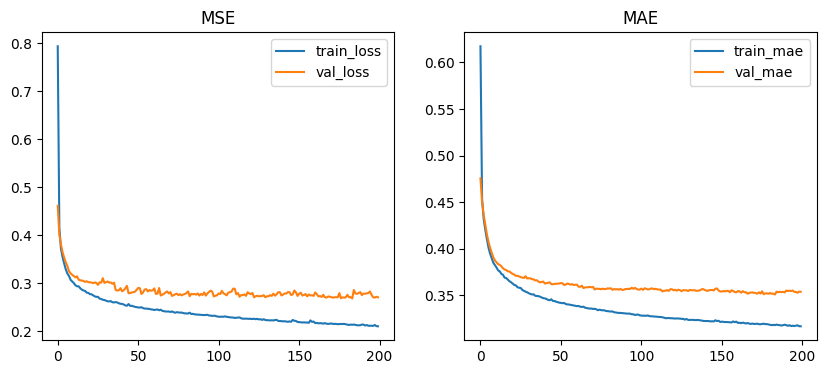

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
RMSE: 0.5203475332928869


In [6]:
# MLP regresi (Keras)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Load
data = fetch_california_housing()
X = data.data; y = data.target

# 2. Preprocess
scaler = StandardScaler(); Xs = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(Xs, y, test_size=0.2, random_state=42)

# 3. Build model
model = Sequential([
Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
Dense(32, activation='relu'),
Dense(1)
])
model.compile(optimizer=Adam(1e-3), loss='mse', metrics=['mae'])

# 4. Train
h = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=32, verbose=0)

# 5. Plot
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); plt.plot(h.history['loss'], label='train_loss'); plt.plot(h.history['val_loss'], label='val_loss'); plt.legend(); plt.title('MSE')
plt.subplot(1,2,2); plt.plot(h.history['mae'], label='train_mae'); plt.plot(h.history['val_mae'], label='val_mae'); plt.legend(); plt.title('MAE')
plt.show()

from sklearn.metrics import mean_squared_error
pred = model.predict(X_val)
print('RMSE:', np.sqrt(mean_squared_error(y_val, pred)))